# Contours

In [22]:
import cv2
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

## Understanding Contours

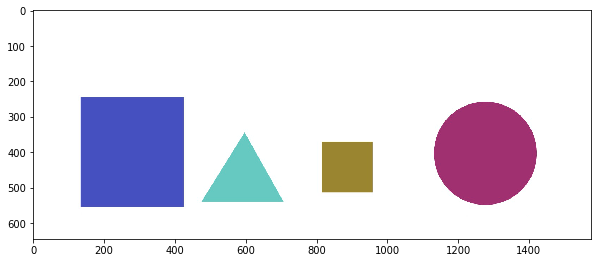

In [27]:
# Let's load a simple image with 3 black squares

# Load our image
image = cv2.imread('images/bunchofshapes.jpg')
plt.figure(figsize=(10,16))
plt.imshow(image)
plt.show()

Number of Contours found = 4


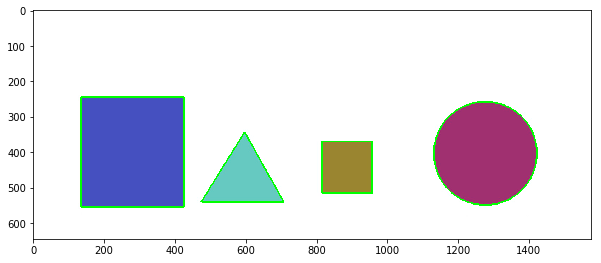

In [28]:
# Create a copy of our original image
copy_image_1 = image.copy()

# Grayscale our image
gray = cv2.cvtColor(copy_image_1,cv2.COLOR_BGR2GRAY)

# Find Canny edges
edged = cv2.Canny(gray, 50, 200)

# Finding Contours
# Use a copy of your image e.g. edged.copy(), since findContours alters the image
_, contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

print("Number of Contours found = " + str(len(contours)))

# Draw all contours and use '-1' as the 3rd parameter to draw all
cv2.drawContours(copy_image_1, contours, -1, (0,255,0), 3)

plt.figure(figsize=(10,16))
plt.imshow(copy_image_1)
plt.show()

## Sorting Contours:

### Sorting by Area: 
It can be use in object recongnition. (Using contour area)
* Eliminalte small contours that may be noise
* Extract the largest contour

In [29]:
# Function we'll use to display contour area
def get_contour_areas(contours):
    # returns the areas of all contours as list
    all_areas = []
    for c in contours:
        area = cv2.contourArea(c)
        all_areas.append(area)
    return all_areas

Contor Areas before sorting:  [20587.5, 22900.5, 66581.5, 90222.0]
Contor Areas after sorting:  [90222.0, 66581.5, 22900.5, 20587.5]


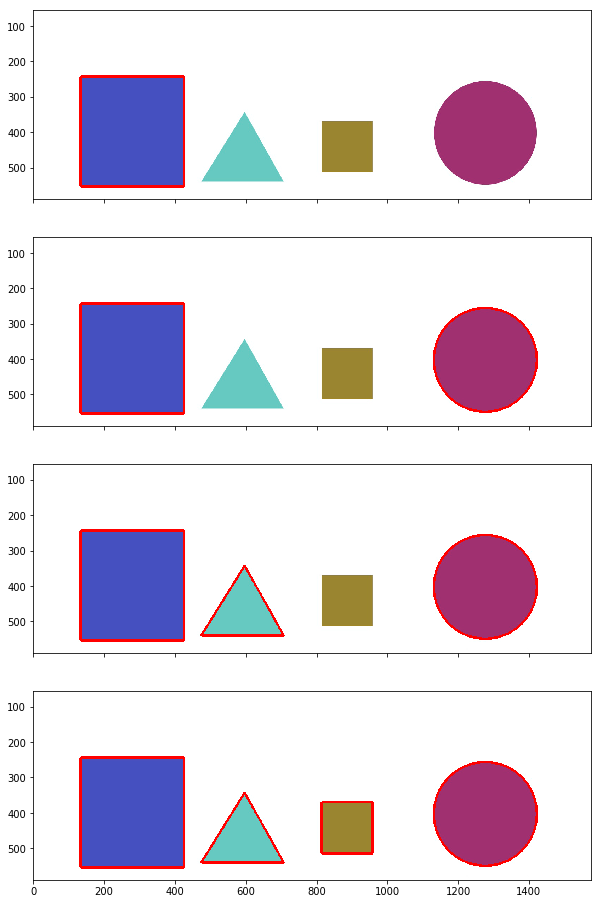

In [31]:
# Create a copy of our original image
copy_image_2 = image.copy()

# Let's print the areas of the contours before sorting
print ("Contor Areas before sorting: ",get_contour_areas(contours))

# Sort contours large to small (reverse = True)
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
#sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)[:3]

print ("Contor Areas after sorting: ",get_contour_areas(sorted_contours))


f, ax = plt.subplots(4, 1, sharex='col', sharey='row',figsize=(10,16))

# Iterate over our contours and draw one at a time
i = 0
for c in sorted_contours:
    cv2.drawContours(copy_image_2, [c], -1, (255,0,0), 5)
    ax[i].imshow(copy_image_2)
    i = i +1
    #ax[0, 0].figure(figsize=(10,16))

### Sorting by spatial position:
* Sort characters left to right
* Process image in specific order

In [47]:
## This function will sort the element by using the position of its centroid on the x axis  
def get_contour_x(contours):
    if cv2.contourArea(contours) > 10:
        M = cv2.moments(contours)
        return (int(M['m10']/M['m00']))

output_shape_number_1.jpg
output_shape_number_2.jpg
output_shape_number_3.jpg
output_shape_number_4.jpg


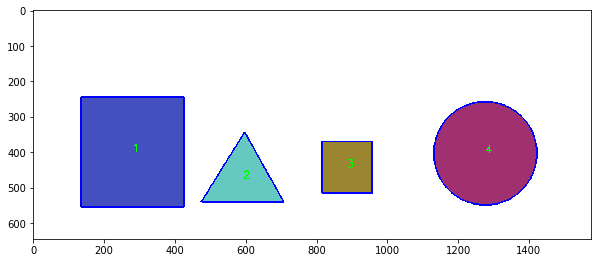

In [48]:
# Create a copy of our original image
copy_image_3 = image.copy()

# Sort by left to right using our x_cord_contour function
contours_left_to_right = sorted(contours, key = get_contour_x, reverse = False)

# Labeling Contours left to right
for (i,c)  in enumerate(contours_left_to_right):
    cv2.drawContours(copy_image_3, [c], -1, (0,0,255), 3) 
    #img = get_contour_x(copy_image_3)
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv2.putText(copy_image_3, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    (x, y, w, h) = cv2.boundingRect(c)  
    
    # Let's now crop each contour and save these images
    cropped_contour = image[y:y + h, x:x + w]
    image_name = "output_shape_number_" + str(i+1) + ".jpg"
    print (image_name)
    cv2.imwrite(image_name, cropped_contour)

plt.figure(figsize=(10,16))
plt.imshow(copy_image_3)
plt.show()

## Approximating Contours:

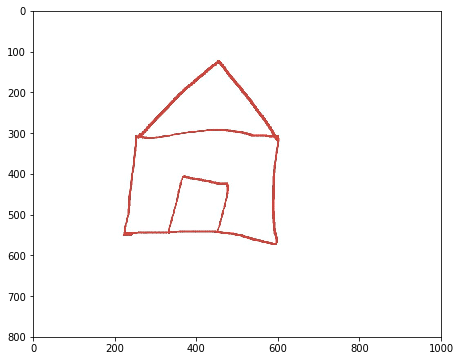

In [54]:
# Load image and keep a copy
image = cv2.imread('images/house.jpg')
orig_image = image.copy()
plt.figure(figsize=(10,6))
plt.imshow(image)
plt.show()

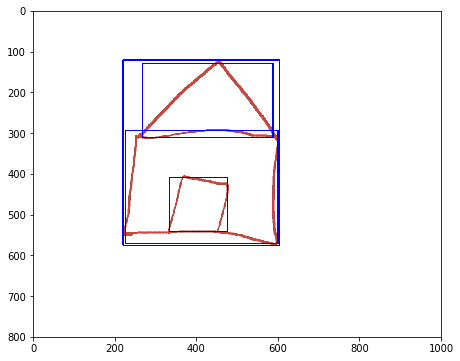

In [56]:
# Grayscale and binarize
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours 
_,contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Iterate through each contour and compute the bounding rectangle
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(orig_image,(x,y),(x+w,y+h),(0,0,255),2)    

plt.figure(figsize=(10,6))
plt.imshow(orig_image)
plt.show()

**cv2.approxPolyDP(contour, Approximation Accuracy, Closed)**
- **contour** – is the individual contour we wish to approximate
- **Approximation Accuracy** –  determines the accuracy of the approximation. Small values give precise-  approximations, large values give more generic approximation.
- **Closed** – a Boolean value that states whether the approximate contour should be open or closed 

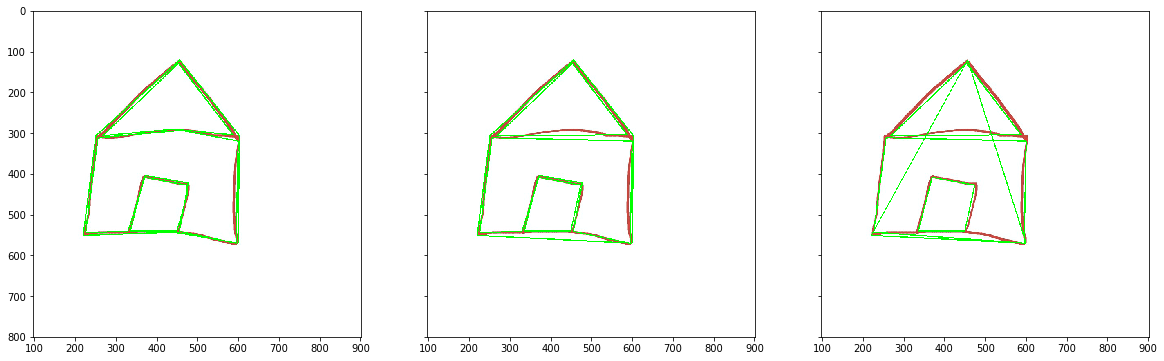

In [62]:
approx_acc = [0.01, 0.03,0.1]
f, ax = plt.subplots(1, 3, sharex='col', sharey='row',figsize=(20,6))
for idx, acc in enumerate(approx_acc): 
    orig_image = image.copy()
    for c in contours:
        epsilon = acc*cv2.arcLength(c,True)
        approx = cv2.approxPolyDP(c,epsilon,True)
        cv2.drawContours(orig_image, [approx], 0, (0, 255, 0), 2)
    
    ax[idx].imshow(orig_image)

## Covnex Hull
The smallest polygon which incluses all the points in the shape

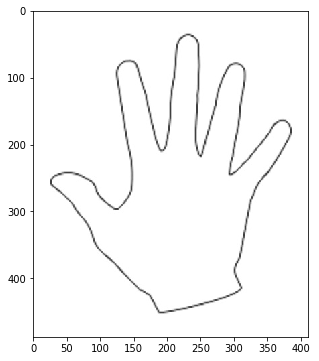

In [66]:
image = cv2.imread('images/hand.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,6))
plt.imshow(image)
plt.show()

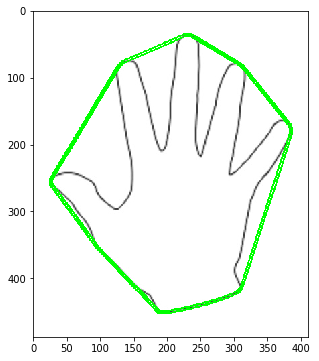

In [68]:
# Threshold the image, because the findcontours comand work only with binary images
ret, thresh = cv2.threshold(gray, 176, 255, 0)

# Find contours 
_,contours,hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Sort Contors by area and then remove the largest frame contour
n = len(contours) - 1
contours = sorted(contours, key=cv2.contourArea, reverse=False)[:n]

orig_image = image.copy()
# Iterate through contours and draw the convex hull
for c in contours:
    hull = cv2.convexHull(c)
    cv2.drawContours(orig_image, [hull], 0, (0, 255, 0), 2)

plt.figure(figsize= (10,6))
plt.imshow(orig_image)
plt.show()

## Shape Matching

**cv2.matchShapes(contour template, contour, method, method parameter)**

**Output** – match value (lower values means a closer match)

- Contour Template – This is our reference contour that we’re trying to find in the new image
- Contour – The individual contour we are checking against
- Method – Type of contour matching (1, 2, 3)
- Method Parameter – leave alone as 0.0 (not fully utilized in python OpenCV)

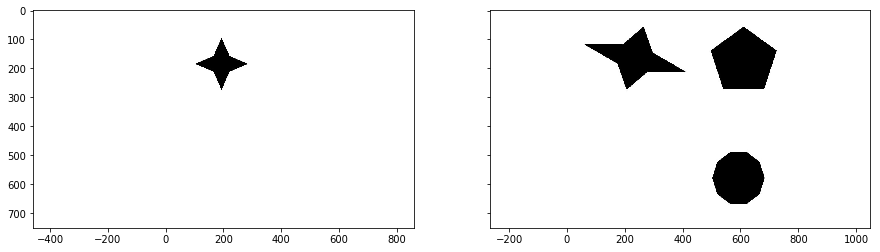

In [109]:
import cv2
import numpy as np

f, ax = plt.subplots(1, 2, sharex='col', sharey='row',figsize=(15,4))

# Load the shape template or reference image
template = cv2.imread('images/4star.jpg',0)
ax[0].imshow(template,'gray')

# Load the target image with the shapes we're trying to match
target = cv2.imread('images/shapestomatch.jpg')
ax[1].imshow(target)

plt.show()

In [103]:
target_gray = cv2.cvtColor(target,cv2.COLOR_BGR2GRAY)

# Threshold both images first before using cv2.findContours
ret, thresh1 = cv2.threshold(template, 127, 255, 0)
ret, thresh2 = cv2.threshold(target_gray, 127, 255, 0)

# Find contours in template
_,contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# We need to sort the contours by area so that we can remove the largest
# contour which is the image outline
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

# We extract the second largest contour which will be our template contour
template_contour = contours[1]

# Extract contours from second target image
_,contours, hierarchy = cv2.findContours(thresh2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)


0.13081562927084459
0.1590200533978871
0.1498791568252558
0.07094034474475601


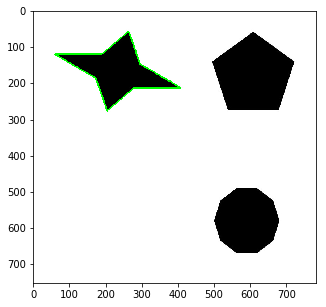

In [118]:
target_copy = target.copy()
closest_contour = []
for c in contours:
    # Iterate through each contour in the target image and 
    # use cv2.matchShapes to compare contour shapes
    match = cv2.matchShapes(template_contour, c, 3, 0.0)
    print (match)
    # If the match value is less than 0.1 we
    if match < 0.1:
        closest_contour.append(c)


cv2.drawContours(target_copy, [closest_contour[0]], -1, (0,255,0), 3)
plt.figure(figsize=(10,5))
plt.imshow(target_copy)
plt.show()